# ML Project : Early Cardiovascular Lifestyle Disease Predictor

Step 1 : Import Packages

In [1]:
import numpy as np
import pandas as pd


Step 2 : Load Dataset

In [2]:
df = pd.read_csv("cardio_train.csv",sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Step 3 : Data Preprocessing

In [3]:
df.shape  #Dataset size

(70000, 13)

In [4]:
df.info()   # Data types & nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()   #Statistical summary

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes   # Column data types

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
df.dtypes    # Check Missing values

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Data cleaning

In [8]:
#Convert age

df['age'] = (df['age'] / 365).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


Feature Engineering

In [9]:
# Create BMI 
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

# BMI is a strong lifestyle-related risk factor. 
# Improves model accuracy


In [10]:
# Create High Blood Pressure Indicator

df['high_bp'] = ((df['ap_hi'] > 140) | (df['ap_lo'] > 90)).astype(int)

# Converts raw BP values into a medical risk signal
# Helps the model learn faster

Dropping Unnecessary Columns

In [11]:

df.drop(columns=['id'], inplace=True)

In [12]:
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,high_bp
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0


Step 4 : DEfine Features [X] and Target [y]

In [13]:
X = df.drop('cardio',axis=1)
y = df['cardio']

Step 5 : Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#stratify=y keeps class balance.

Step 6 : Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# joblib.dump(scaler, "scaler.pkl")

Step 7 : Train the Model using a Baseline [LogisticRegression]

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', C=0.5, max_iter=1000) #max_iter=

lr.fit(X_train_scaled,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.5
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

Step 8 : Evaluate Model

In [17]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = lr.predict(X_test_scaled)

print("Accuracy : ",accuracy_score(y_test,y_pred))
print()
print("Classifiction report :\n",classification_report(y_test,y_pred))

Accuracy :  0.7053571428571429

Classifiction report :
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      7004
           1       0.74      0.63      0.68      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.70     14000
weighted avg       0.71      0.71      0.70     14000



Step 9 : Train a Stronger Model

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [8, 10, None],
    
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42,class_weight='balanced'),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    
)

grid.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [8, 10, ...], 'n_estimators': [200, 300]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : th

In [19]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      7004
           1       0.76      0.68      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

Accuracy: 0.7305714285714285


In [20]:
from sklearn.metrics import roc_curve

# Get probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Find optimal threshold using Youden’s J statistic
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print("Best Threshold:", best_threshold)


Best Threshold: 0.5296795062872788


Step 10 : Visualization

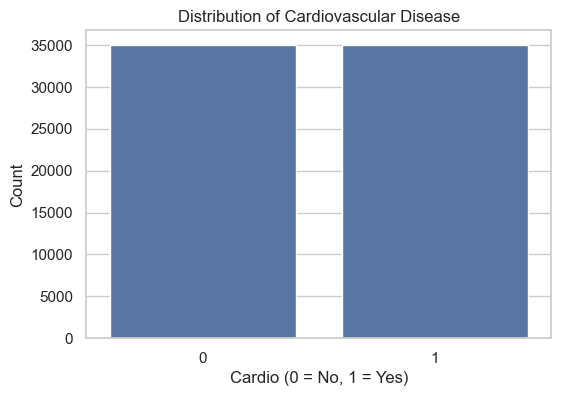

In [21]:
#Target variable distribution >> Shows class balance (cardio vs no cardio)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df)
plt.title("Distribution of Cardiovascular Disease")
plt.xlabel("Cardio (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


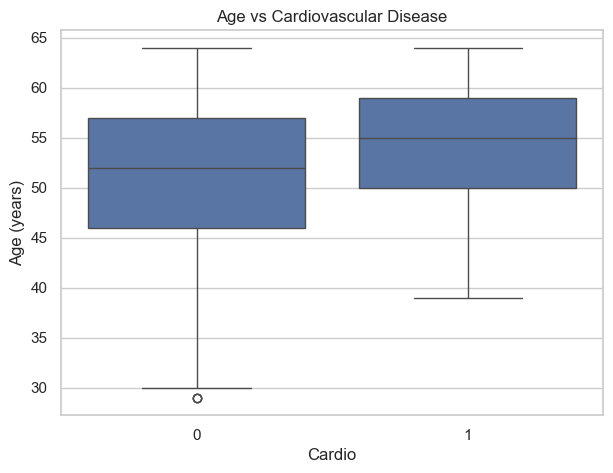

In [22]:
#Age vs Cardiovascular Disease >> Shows how disease increases with age

plt.figure(figsize=(7,5))
sns.boxplot(x='cardio', y='age', data=df)
plt.title("Age vs Cardiovascular Disease")
plt.xlabel("Cardio")
plt.ylabel("Age (years)")
plt.show()


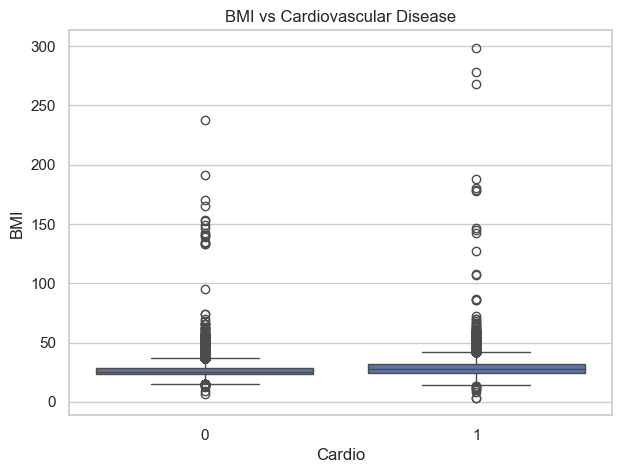

In [23]:
#BMI distribution by disease >> Strong lifestyle indicator

plt.figure(figsize=(7,5))
sns.boxplot(x='cardio', y='BMI', data=df)
plt.title("BMI vs Cardiovascular Disease")
plt.xlabel("Cardio")
plt.ylabel("BMI")
plt.show()


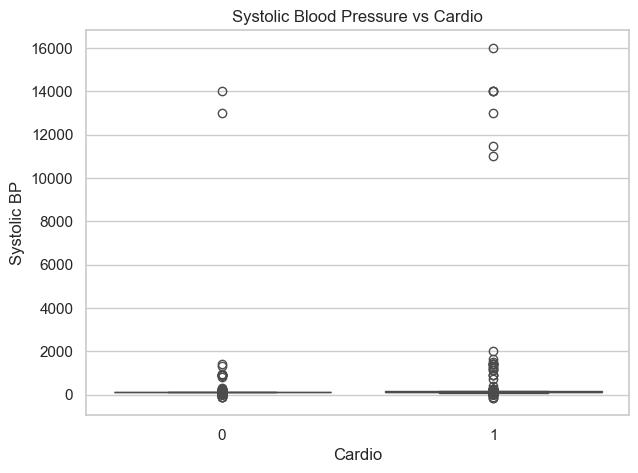

In [24]:
# Blood pressure comparison >> Shows medical risk clearly

plt.figure(figsize=(7,5))
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.title("Systolic Blood Pressure vs Cardio")
plt.xlabel("Cardio")
plt.ylabel("Systolic BP")
plt.show()


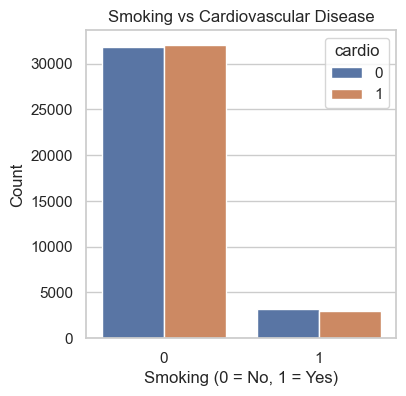

In [25]:
# Lifestyle habits vs disease (smoking, alcohol, activity)

#Smoking

plt.figure(figsize=(4,4))
sns.countplot(x='smoke', hue='cardio', data=df)
plt.title("Smoking vs Cardiovascular Disease")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


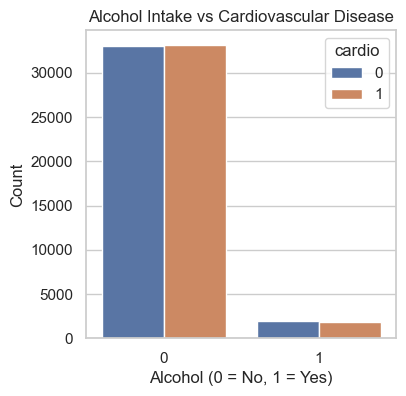

In [26]:
# Alcohol

plt.figure(figsize=(4,4))
sns.countplot(x='alco', hue='cardio', data=df)
plt.title("Alcohol Intake vs Cardiovascular Disease")
plt.xlabel("Alcohol (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

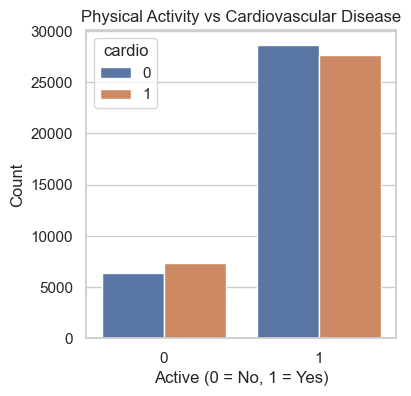

In [27]:
# Physical Activity

plt.figure(figsize=(4,4))
sns.countplot(x='active', hue='cardio', data=df)
plt.title("Physical Activity vs Cardiovascular Disease")
plt.xlabel("Active (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


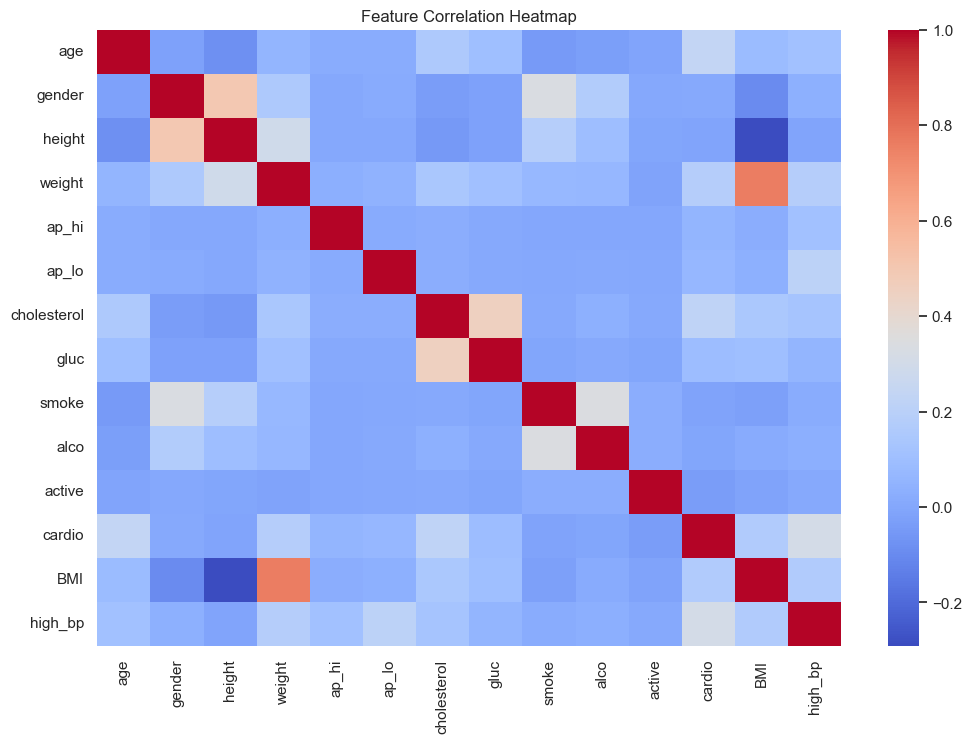

In [28]:
#Correlation heatmap >> Shows feature relationships

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


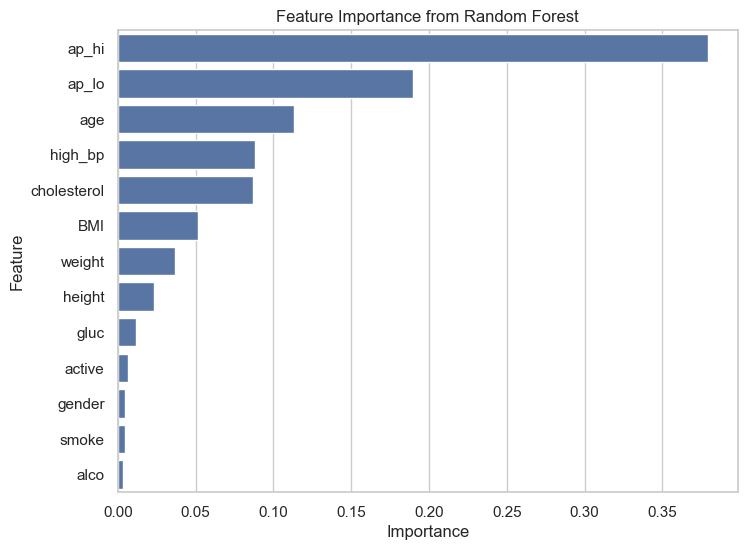

In [29]:
# Feature importance from Random Forest >> Shows which features matter most

importances = best_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()


In [30]:
import joblib

joblib.dump(best_model, "cardio_model.pkl")


['cardio_model.pkl']